# Mini Project 5-3 Explore Sampling

## Introduction
In this project, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this project, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this project includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [1]:
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Import data.
modified_air_quality = pd.read_csv('modified_c4_epa_air_quality.csv')
modified_air_quality = modified_air_quality.dropna()

## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [3]:
# First 10 rows of the data
modified_air_quality.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910
10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,1.386294


### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [6]:
# Code Here
modified_air_quality.describe()
modified_air_quality['aqi_log'].isnull().sum()



np.int64(0)

**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

A:1.768918

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

In [ ]:
A:Based on the descriptive statistics table for the aqi_log column, I notice that the count value is 257. This means that there are 257 non-null values in this column.

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [8]:
# Code Here
population_mean = modified_air_quality['aqi_log'].mean()
print(population_mean)

1.7689182585091165


## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [10]:
# Code Here
sampled_data =modified_air_quality.sample(n=50, replace=True, random_state=42)


### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [11]:
# Code Here
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
104,2018-01-01,Arizona,Pima,Tucson,22ND & ALVERNON,Carbon monoxide,Parts per million,1.386294
108,2018-01-01,North Dakota,Burleigh,Bismarck,BISMARCK RESIDENTIAL,Carbon monoxide,Parts per million,1.098612
73,2018-01-01,Minnesota,Dakota,Lakeville,Near Road I-35,Carbon monoxide,Parts per million,1.098612
190,2018-01-01,California,Madera,Madera,Madera-Pump Yard,Carbon monoxide,Parts per million,1.791759
21,2018-01-01,Iowa,Linn,Cedar Rapids,Public Health,Carbon monoxide,Parts per million,0.693147
104,2018-01-01,Arizona,Pima,Tucson,22ND & ALVERNON,Carbon monoxide,Parts per million,1.386294
123,2018-01-01,Michigan,Wayne,Detroit,MARK TWAIN MIDDLE SCHOOL,Carbon monoxide,Parts per million,2.302585
216,2018-01-01,Indiana,Vanderburgh,Evansville,Evansville- Lloyd,Carbon monoxide,Parts per million,1.098612
89,2018-01-01,Maryland,Howard,North Laurel,Howard County Near Road,Carbon monoxide,Parts per million,1.386294
101,2018-01-01,Pennsylvania,Adams,Not in a city,NARSTO SITE ARENDTSVILLE,Carbon monoxide,Parts per million,1.098612


**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

A: it is possible because I sampled with replacement. 

**Question:** What does `random_state` do?

A: A **random seed** is a starting point for generating random numbers. You can use any arbitrary number to fix the random seed, and give the random number generator a starting point. Also, going forward, you can use the same random seed to generate the same set of numbers.

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [12]:
# Code Here
sampled_mean = sampled_data['aqi_log'].mean()
print(sampled_mean)

1.623784685228703


You have a 95% confidence interval for the mean district literacy rate that stretches from about X % to Y%. 

95% CI: (X, Y)

 **Question:**  Why is `sample_mean` different from `population_mean`?


A:The sample_mean is different from the population_mean because the sample is a subset of the population, and it may not perfectly represent the entire population. Sampling variability, which is the natural variation in sample statistics from one sample to another, can cause the sample mean to differ from the population mean. Additionally, since the sample was taken with replacement, some data points may be repeated, further contributing to the difference.



### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [13]:
# Code Here
estimate_list = []
for i in range(10000):
    estimate_list.append(modified_air_quality['aqi_log'].sample(n=50, replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [14]:
# Code Here
estimate_df.head(10)

,estimate
0,1.914027
1,1.830119
2,2.010248
3,1.680339
4,1.951527
5,1.885662
6,1.616420
7,1.816766
8,1.893101
9,1.900095


### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [15]:
# Code Here
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

np.float64(1.7693035829221768)

**Question:** What is the mean for the sampling distribution of 10,000 random samples?

In [16]:
# Code Here
mean_sample_means

np.float64(1.7693035829221768)

**Question:** How are the central limit theorem and random sampling (with replacement) related?

In [ ]:
# Code Here
#The central limit theorem (CLT) states that the sampling distribution of the sample mean will be approximately normally distributed, regardless of the shape of the population distribution, provided the sample size is sufficiently large. This theorem holds true even when sampling is done with replacement.

Random sampling (with replacement) ensures that each sample is independent and identically distributed (i.i.d). This is a key assumption for the central limit theorem to apply. By repeatedly drawing random samples with replacement, we can create a sampling distribution of the sample mean, which, according to the CLT, will tend to be normally distributed as the number of samples increases.

A:

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

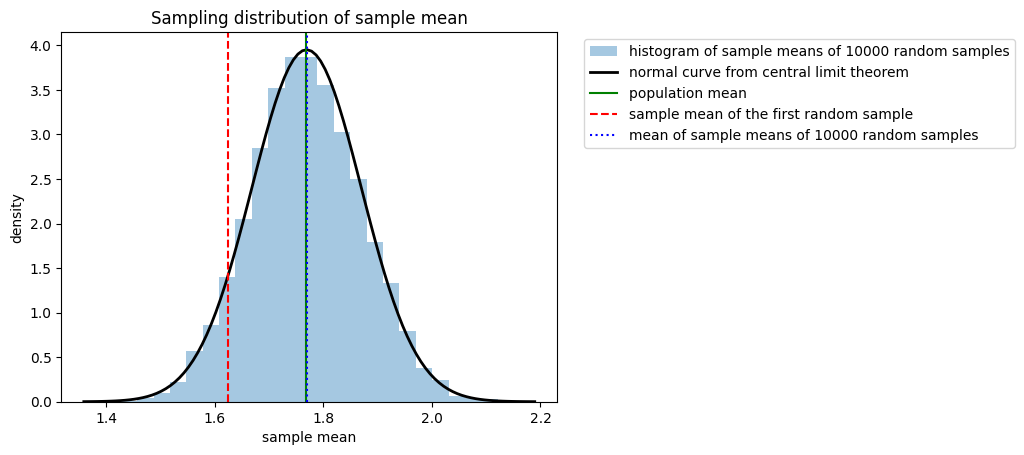

In [18]:
# Code Here
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sampled_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [19]:
# Calculate the standard error of the mean AQI
standard_error = sampled_data['aqi_log'].std() / np.sqrt(len(sampled_data))
print(standard_error)

0.10600245605967076


## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

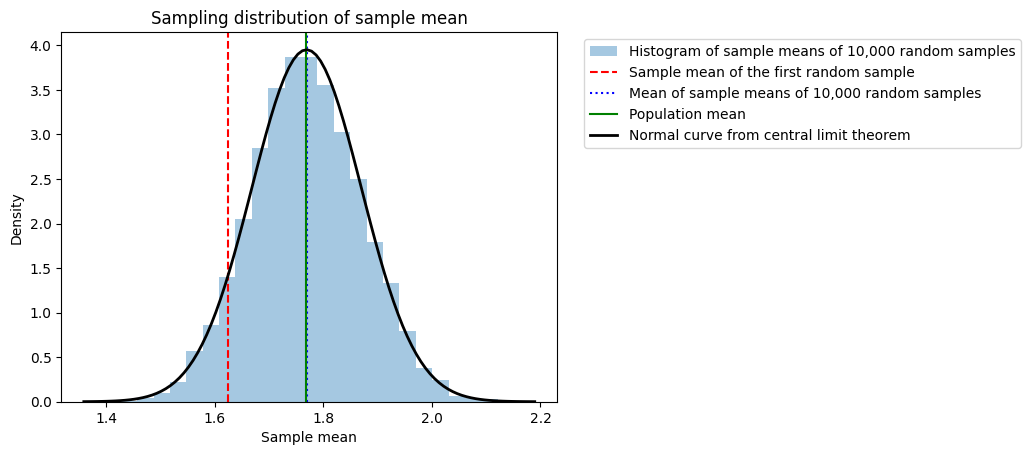

In [20]:
# Plot a histogram of the 10,000 sample means
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label="Histogram of sample means of 10,000 random samples")

# Add a vertical line indicating the mean of the first single sample of 50
plt.axvline(x=sampled_mean, color='r', linestyle='--', label='Sample mean of the first random sample')

# Add another vertical line indicating the mean of the means of the 10,000 samples
plt.axvline(x=mean_sample_means, color='b', linestyle=':', label='Mean of sample means of 10,000 random samples')

# Add a third vertical line indicating the mean of the actual population
plt.axvline(x=population_mean, color='g', linestyle='solid', label='Population mean')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p, 'k', linewidth=2, label='Normal curve from central limit theorem')

# Add titles and labels
plt.title("Sampling distribution of sample mean")
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.04, 1))
plt.show()

**Question:** What insights did you gain from the preceding sampling distribution?

In [ ]:
**Insights from the preceding sampling distribution:**

1. **Central Limit Theorem**: The sampling distribution of the sample mean is approximately normally distributed, even though the original population distribution may not be normal. This is evident from the histogram of the sample means, which resembles a normal distribution.

2. **Population Mean**: The mean of the sampling distribution (mean of sample means) is very close to the population mean. This demonstrates that the sample means are unbiased estimators of the population mean.

3. **Sample Variability**: The variability in the sample means (standard error) is smaller than the variability in the individual data points. This indicates that averaging reduces the impact of extreme values and provides a more stable estimate of the population mean.

4. **Confidence Intervals**: The histogram and the normal curve provide a visual representation of the confidence intervals. Most of the sample means fall within a certain range around the population mean, indicating the reliability of the sample mean as an estimator.

5. **Effect of Sample Size**: The larger the number of samples (10,000 in this case), the more the sampling distribution approximates a normal distribution, and the closer the mean of the sample means is to the population mean.

These insights highlight the importance of random sampling and the central limit theorem in statistical analysis, providing a foundation for making inferences about the population from sample data.

A:

# Considerations

**What are some key takeaways that you learned from this project?**

A:

In [ ]:
**Key Takeaways:**

1. **Central Limit Theorem (CLT)**: The CLT is a fundamental principle in statistics that states that the sampling distribution of the sample mean will be approximately normally distributed, regardless of the population distribution, provided the sample size is sufficiently large. This project demonstrated the CLT by showing that the distribution of sample means from 10,000 samples approximates a normal distribution.

